# Week 17, Abalone Data Set 

**1.	Preprocess your dataset. Indicate which steps worked and which didn’t. Include your thoughts on why certain steps worked and certain steps didn’t.**

In [1]:
import numpy as np
import pandas as pd

#credit_df = pd.read_table("australian.dat", sep=" ",header=None)
abalone_df = pd.read_csv('abalone.data', header=None)

In [2]:
abalone_df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# sex, length, diameter, height, whole_weight, shucked_weight, viscera_weight, shell_weight, rings

abalone_df.rename(columns = {0:'sex',
                             1:'length',
                             2:'diameter',
                             3:'height',
                             4:'whole_weight',
                             5:'shucked_weight',
                             6:'viscera_weight',
                             7:'shell_weight',
                             8:'rings'
                            },
                  inplace=True
                 )
                  
abalone_df.tail()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


In [4]:
abalone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4177 non-null   object 
 1   length          4177 non-null   float64
 2   diameter        4177 non-null   float64
 3   height          4177 non-null   float64
 4   whole_weight    4177 non-null   float64
 5   shucked_weight  4177 non-null   float64
 6   viscera_weight  4177 non-null   float64
 7   shell_weight    4177 non-null   float64
 8   rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [5]:
abalone_df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


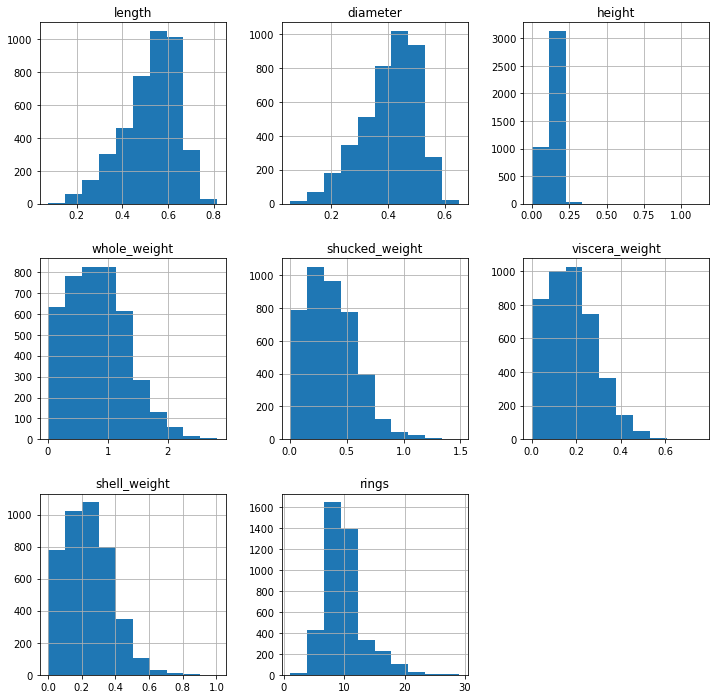

In [6]:
abalone_df.hist(figsize=(12,12));

Remove outliers based on rings - remove data with little representation in the target

In [7]:
abalone_df['rings'].value_counts().sort_index()

1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: rings, dtype: int64

Rings is classes from 1-3 and 21-29 have little data on which to base a model. Next step is to eliminate that data.

In [8]:
clean_ab_df = abalone_df[(abalone_df['rings'] < 21) & (abalone_df['rings']>3)]
clean_ab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4124 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             4124 non-null   object 
 1   length          4124 non-null   float64
 2   diameter        4124 non-null   float64
 3   height          4124 non-null   float64
 4   whole_weight    4124 non-null   float64
 5   shucked_weight  4124 non-null   float64
 6   viscera_weight  4124 non-null   float64
 7   shell_weight    4124 non-null   float64
 8   rings           4124 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 322.2+ KB


In [9]:
clean_ab_df.describe()

,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
count,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000,4124.000000
mean,0.524682,0.408385,0.139577,0.827977,0.360042,0.180696,0.238002,9.852085
std,0.118152,0.097708,0.041329,0.487015,0.221500,0.109155,0.137183,2.978123
min,0.130000,0.095000,0.000000,0.010500,0.005000,0.000500,0.003500,4.000000
25%,0.450000,0.350000,0.115000,0.442500,0.186875,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.798500,0.336000,0.170750,0.231500,9.000000
75%,0.615000,0.480000,0.165000,1.150000,0.502250,0.252500,0.325000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,20.000000


<AxesSubplot:>

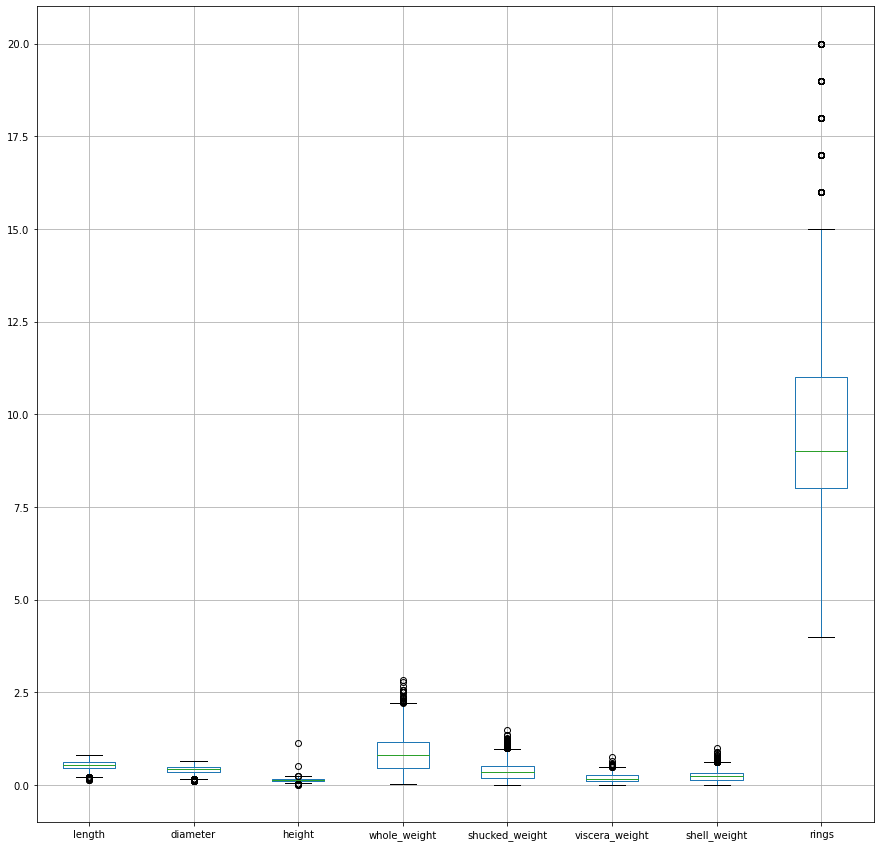

In [10]:
clean_ab_df.boxplot(figsize=(15,15))

In [11]:
clean_ab_df.reset_index(drop=True, inplace=True)
clean_ab_df

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4119,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4120,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4121,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4122,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


Using Z-score to further clean data. Looking to see if a z score of 3 is a good choice.

First, create the z-scores.   Second, look at the amount of data affected.  Third, drop data rows where z is greater than threshold

In [12]:
from scipy import stats
# must drop sex from zscore since that is string object
z = np.abs(stats.zscore(clean_ab_df.drop('sex', axis=1)))
print(len(z))
print(z)

4124
[[0.58983923 0.44408092 1.07870903 ... 0.73020949 0.6415742  1.72878671]
 [1.47863131 1.46766114 1.19970329 ... 1.21123708 1.224809   0.95779507]
 [0.04501226 0.1188882  0.11075493 ... 0.35913106 0.20414809 0.28614962]
 ...
 [0.63754032 0.68185732 1.58316474 ... 0.97858378 0.51031454 0.28614962]
 [0.84915749 0.78421534 0.25222785 ... 0.73577937 0.42282932 0.0496731 ]
 [1.56865584 1.50072149 1.34117621 ... 1.79404008 1.8736259  0.72131854]]


In [13]:
z_threshold = 3
print(len(np.where(z > z_threshold)[0])) #number of rows of data affected
print(np.where(z > z_threshold))

189
(array([   6,    9,   33,   72,   81,  127,  128,  148,  162,  163,  164,
        164,  164,  165,  165,  166,  166,  167,  169,  233,  250,  269,
        270,  285,  301,  321,  341,  344,  344,  348,  351,  358,  361,
        402,  403,  413,  416,  426,  464,  478,  508,  550,  560,  571,
        619,  641,  649,  667,  667,  669,  669,  715,  725,  727,  861,
        861,  861, 1017, 1020, 1020, 1021, 1021, 1142, 1161, 1165, 1167,
       1170, 1172, 1174, 1174, 1175, 1175, 1175, 1175, 1177, 1177, 1225,
       1385, 1385, 1386, 1390, 1394, 1395, 1395, 1395, 1396, 1495, 1721,
       1723, 1724, 1726, 1728, 1729, 1729, 1729, 1730, 1730, 1730, 1788,
       1949, 1953, 1954, 1954, 2018, 2057, 2068, 2080, 2080, 2122, 2125,
       2126, 2134, 2134, 2134, 2141, 2164, 2170, 2235, 2236, 2238, 2301,
       2308, 2315, 2323, 2325, 2337, 2337, 2414, 2426, 2454, 2499, 2578,
       2579, 2579, 2579, 2580, 2664, 2665, 2665, 2764, 2764, 2765, 2765,
       2765, 2816, 2817, 2817, 2817, 2961, 296

In [14]:
#rows to be dropped
remove_rows = list(np.where(z > z_threshold)[0])
print(remove_rows)  #checking

[6, 9, 33, 72, 81, 127, 128, 148, 162, 163, 164, 164, 164, 165, 165, 166, 166, 167, 169, 233, 250, 269, 270, 285, 301, 321, 341, 344, 344, 348, 351, 358, 361, 402, 403, 413, 416, 426, 464, 478, 508, 550, 560, 571, 619, 641, 649, 667, 667, 669, 669, 715, 725, 727, 861, 861, 861, 1017, 1020, 1020, 1021, 1021, 1142, 1161, 1165, 1167, 1170, 1172, 1174, 1174, 1175, 1175, 1175, 1175, 1177, 1177, 1225, 1385, 1385, 1386, 1390, 1394, 1395, 1395, 1395, 1396, 1495, 1721, 1723, 1724, 1726, 1728, 1729, 1729, 1729, 1730, 1730, 1730, 1788, 1949, 1953, 1954, 1954, 2018, 2057, 2068, 2080, 2080, 2122, 2125, 2126, 2134, 2134, 2134, 2141, 2164, 2170, 2235, 2236, 2238, 2301, 2308, 2315, 2323, 2325, 2337, 2337, 2414, 2426, 2454, 2499, 2578, 2579, 2579, 2579, 2580, 2664, 2665, 2665, 2764, 2764, 2765, 2765, 2765, 2816, 2817, 2817, 2817, 2961, 2962, 3094, 3102, 3140, 3145, 3196, 3269, 3270, 3310, 3311, 3324, 3332, 3343, 3378, 3378, 3378, 3548, 3548, 3577, 3662, 3664, 3664, 3664, 3664, 3749, 3785, 3785, 3813, 3

In [15]:
clean_ab_df.drop(remove_rows, axis=0, inplace=True)
clean_ab_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3979 entries, 0 to 4123
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             3979 non-null   object 
 1   length          3979 non-null   float64
 2   diameter        3979 non-null   float64
 3   height          3979 non-null   float64
 4   whole_weight    3979 non-null   float64
 5   shucked_weight  3979 non-null   float64
 6   viscera_weight  3979 non-null   float64
 7   shell_weight    3979 non-null   float64
 8   rings           3979 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 310.9+ KB


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4305: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

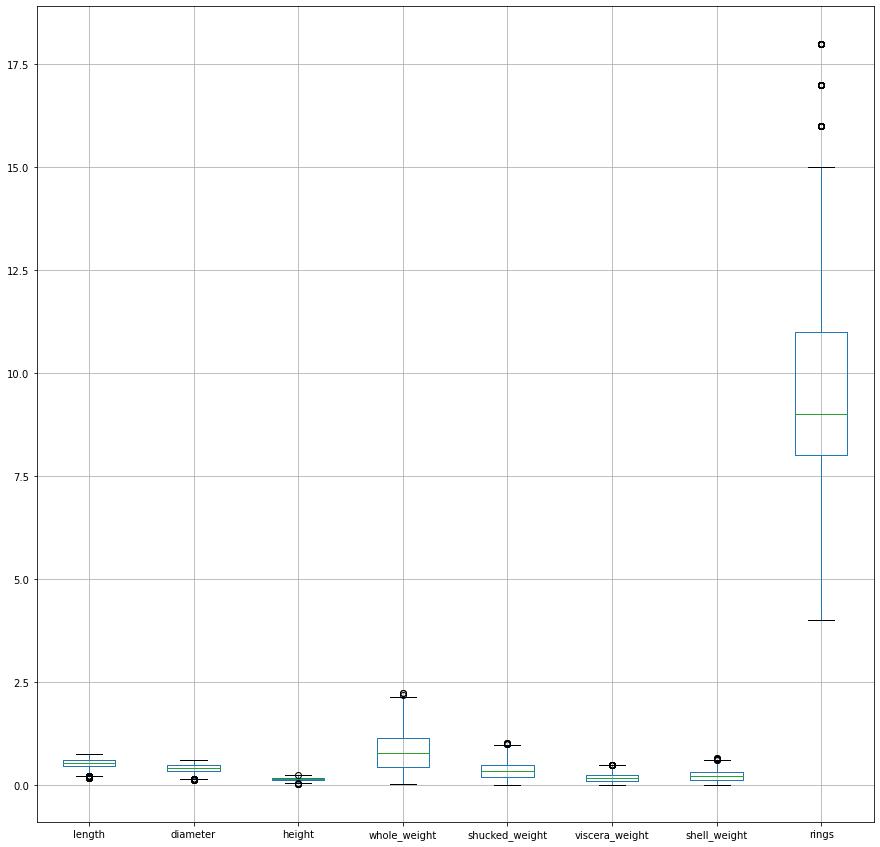

In [18]:
clean_ab_df.boxplot(figsize=(15, 15))

The worst of the outliers have been dropped.

**3979 samples kept = 96.48% of the original data**  This may or may not be enough to make a nice model.

Using label encoder to change sex into values

In [20]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
clean_ab_df['sex_cat'] = labelencoder.fit_transform(clean_ab_df['sex'])

<ipython-input-20-5266cb1eec60>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_ab_df['sex_cat'] = labelencoder.fit_transform(clean_ab_df['sex'])


In [21]:
clean_ab_df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings,sex_cat
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,2
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,2
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1


### 2.	Create a decision tree model tuned to the best of your abilities. Explain how you tuned it.

Creating a regression tree first I will try using all the features.

Run number

1 - max_depth = 8, min_samples_leaf = 5
RMSE 2.1143

2 - max_depth=6, min_samples_leaf=5
RMSE 2.0554

3 - max_depth=4, min_samples_leaf=5
RMSE 2.0631

4 - max_depth=5, min_samples_leaf=5
RMSE 2.0245

5 - max_depth=5, min_samples_leaf=10
RMSE 2.0195


In [84]:
from sklearn.model_selection import train_test_split

X = clean_ab_df.drop(['rings', 'sex'], axis=1)
y = clean_ab_df['rings']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42, stratify=y)

In [99]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE

tree_model = DecisionTreeRegressor(max_depth=6, min_samples_leaf=30, random_state=42)

In [100]:
tree_model.fit(X_train, y_train)

y_pred_test = tree_model.predict(X_test)

rmse = MSE(y_test, y_pred)**.5
print('Decision Tree Regressor RSME test set:', rmse)

Decision Tree Regressor RSME test: 2.019544318543961


In [135]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, tree_model.feature_importances_):
    feats[feature] = importance #add the name/value pair
feats

{'length': 0.00018440001827398162,
 'diameter': 0.009918001511958102,
 'height': 0.009537312109107543,
 'whole_weight': 0.011643802215396742,
 'shucked_weight': 0.12743221040342895,
 'viscera_weight': 0.0026074727040553973,
 'shell_weight': 0.822254626678521,
 'sex_cat': 0.016422174359258374}

In [102]:
from sklearn.model_selection import cross_val_score
MSE_CV = - cross_val_score(tree_model, X_train, y_train, cv=10, scoring='neg_mean_squared_error',
                        n_jobs=-1)

In [103]:
y_pred_train = tree_model.predict(X_train)
print('Train RMSE: {:.2f}'.format((MSE(y_train, y_pred_train))**.5))

Train RMSE: 1.77


In [104]:
print('CV MSE: {:.2f}'.format(MSE_CV.mean()))

CV MSE: 3.73


In [105]:
print('RMSE for model: {:.2f}'.format(MSE_CV.mean()**.5))

RMSE for model: 1.93


**Discussion of Model above**

I tried tuning the model because the RMSE scores seem to suggest the model overfits to the training data.  The RMSE of the training data is the lowest while the RMSE for the test data is higher.

So, after trying to tune the tree by hand, I will try a GridSearch.

In [125]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeRegressor(random_state=42)

# define parameters
params_dt = {'max_depth':[3, 4, 5, 6, 7, 8],
             'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
             'max_features': [.2, .4, .6, .8, 1]
            }

grid_dt = GridSearchCV(estimator=dt,
                      param_grid=params_dt,
                      scoring = 'neg_mean_squared_error',
                      cv=10, verbose=3,
                      n_jobs=-1)

In [126]:
grid_dt.fit(X_train, y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'max_features': [0.2, 0.4, 0.6, 0.8, 1],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35]},
             scoring='neg_mean_squared_error', verbose=3)

In [127]:
best_params = grid_dt.best_params_
print('Best Parameters for Decision Tree Regressor: ', best_params)

Best Parameters for Decision Tree Regressor:  {'max_depth': 7, 'max_features': 0.8, 'min_samples_leaf': 30}


In [129]:
best_dt_reg_model = grid_dt.best_estimator_
y_pred_test = best_dt_reg_model.predict(X_test)
rmse_test = MSE(y_test, y_pred_test)**.5
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 1.984


In [131]:
y_pred_train = best_dt_reg_model.predict(X_train)
rmse_train = MSE(y_train, y_pred_train)**.5
print('Train set RMSE: {:.3f}'.format(rmse_train))

Train set RMSE: 1.758


In [134]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_dt_reg_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
feats

{'length': 0.010505484804482528,
 'diameter': 0.012556100251824524,
 'height': 0.007096560826254071,
 'whole_weight': 0.041419088618933404,
 'shucked_weight': 0.10900391882721483,
 'viscera_weight': 0.06391368082136929,
 'shell_weight': 0.7317091984061846,
 'sex_cat': 0.023795967443736684}

Test set RMSE is slightly better than the previous model.

Previous model RMSE on test set: 2.0195

The current best model still seems to be slightly overfitted.

### Decision Tree Regression

So based on playing with a Decision Tree Regression model, the best way to tune was to use a GridSearchCV.  However, based on RMSE metrics, the model still seems overly tuned to the training set.   Is this bad?  I have no idea.  But I'm not sure how to move the model to a fit that is optimal.

Based on the feature importance, the shell weight is the most important feature at 73% and shucked weight is next at 11%.   Compared to the hand tuned model, the most important feature was shell weight at 82% and shucked weight at 12%.

### 3.	Create a random forest model tuned to the best of your abilities. Explain how you tuned it.

Because GridSearchCV worked so well above, I will used it again to tune features of the Random Forest model.

I will reuse X_train, y_train, X_test, and y_test

In [149]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)

In [150]:
# using parameters informed by the decision tree
params_rf = {'n_estimators': [200, 350, 500],
            'max_depth': [4, 5, 6, 7, 8],
            'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
            'max_features': [3, 4, 5, 6, 7, 8],
            'bootstrap': [True, False]}

In [151]:
#setting cv=3 because this is rather computationally intensive
grid_rf = GridSearchCV(estimator=rf,
                      param_grid=params_rf,
                      cv=3, 
                      scoring='neg_mean_squared_error',
                        verbose=3,
                      n_jobs=-1)

In [152]:
grid_rf.fit(X_train, y_train)

Fitting 3 folds for each of 1260 candidates, totalling 3780 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [5, 10, 15, 20, 25, 30, 35],
                         'n_estimators': [200, 350, 500]},
             scoring='neg_mean_squared_error', verbose=3)

In [153]:
best_params = grid_rf.best_params_
print('Best Parameters for Random Forest: ', best_params)

Best Parameters for Random Forest:  {'bootstrap': True, 'max_depth': 8, 'max_features': 5, 'min_samples_leaf': 5, 'n_estimators': 500}


In [154]:
best_rf_model = grid_rf.best_estimator_
y_pred_test = best_rf_model.predict(X_test)
rmse_test = MSE(y_test, y_pred_test)**.5
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 1.886


In [155]:
y_pred_train = best_rf_model.predict(X_train)
rmse_train = MSE(y_train, y_pred_train)**.5
print('Train set RMSE: {:.3f}'.format(rmse_train))

Train set RMSE: 1.480


In [156]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_rf_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
feats

{'length': 0.031087044776732086,
 'diameter': 0.05098432693318846,
 'height': 0.11836660070602556,
 'whole_weight': 0.08724322816286906,
 'shucked_weight': 0.1306567389489885,
 'viscera_weight': 0.08748139017903583,
 'shell_weight': 0.4679530590160444,
 'sex_cat': 0.026227611277116144}

In [187]:
scores = -cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('RMSE model score: ', scores.mean()**.5)

RMSE model score:  1.8598146045913218


### Random Forest Regression

So based on playing with a Decision Tree Regression model above, the best way to tune was to use a GridSearchCV for the Random Forest.  However, based on RMSE metrics, the model still seems overly tuned to the training set.   Is this bad?  I have no idea.  But I'm not sure how to move the model to a fit that is optimal.

The Random Forest Grid Search took a long time to run.  In retrospect, I should have not tested Bootstrap (leaving it as True), and I would have set the n_estimators to just 2 sizes.

While both RSME for the train set and the test set decreased, the model still seems overfitted to the training data.

*Large changes to the feature importance*
Based on the feature importance, the shell weight is the most important feature at 47% and shucked weight is next at 13%.   Compared to the DecisionTreeRegressor, this model takes more the features into account for the target

### 4.	Create an xgboost model tuned to the best of your abilities. Explain how you tuned it.

XGBoost Regression, UNTUNED

In [158]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [168]:
scores = -cross_val_score(xgb, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('RMSE model score: ', scores.mean()**.5)

RMSE model score:  1.9415969098439754


In [159]:
y_pred_test = xgb.predict(X_test)
rmse_test = MSE(y_test, y_pred_test)**.5
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 2.039


In [161]:
y_pred_train = xgb.predict(X_train)
rmse_train = MSE(y_train, y_pred_train)**.5
print('Train set RMSE: {:.3f}'.format(rmse_train))

Train set RMSE: 0.604


In [162]:
xgb.feature_importances_

array([0.02957726, 0.04240336, 0.05299209, 0.05823243, 0.09411063,
       0.05634573, 0.56538737, 0.10095114], dtype=float32)

XGBooost Model - Tuned with GridSearch

In [180]:
xgb = XGBRegressor(random_state=42)

In [181]:
# using parameters informed by the decision tree
params_xgb = {'nrounds': [100, 200, 300],
              'max_depth': [4, 5, 6, 7, 8, 10],
             'subsample': [.5],
             'alpha': [.001, .01, .1]
             }

grid_xgb = GridSearchCV(estimator=xgb,
                      param_grid=params_xgb,
                      cv=3, 
                      scoring='neg_mean_squared_error',
                        verbose=3,
                      n_jobs=-1)

In [182]:
grid_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[21:18:58] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:541: 
Parameters: { nrounds } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=42,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_parame

In [183]:
best_params = grid_xgb.best_params_
print('Best Parameters for XGBoost: ', best_params)

Best Parameters for XGBoost:  {'alpha': 0.1, 'max_depth': 4, 'nrounds': 100, 'subsample': 0.5}


In [184]:
best_xgb_model = grid_xgb.best_estimator_
y_pred_test = best_xgb_model.predict(X_test)
rmse_test = MSE(y_test, y_pred_test)**.5
print('Test set RMSE: {:.3f}'.format(rmse_test))

Test set RMSE: 2.079


In [185]:
y_pred_train = best_xgb_model.predict(X_train)
rmse_train = MSE(y_train, y_pred_train)**.5
print('Train set RMSE: {:.3f}'.format(rmse_train))

Train set RMSE: 1.198


In [186]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, best_xgb_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 
    
feats

{'length': 0.06398871,
 'diameter': 0.06702115,
 'height': 0.1209875,
 'whole_weight': 0.08478504,
 'shucked_weight': 0.116066664,
 'viscera_weight': 0.08759456,
 'shell_weight': 0.3561083,
 'sex_cat': 0.103448145}

### XGBoost Regression

I first tried XGBoost without tuning and the model performed ok.  After trying GridSearch, the model performed about the same.

I am most concerned about the RMSE for both the test and train data.   The train data RMSE is very low.

*There were more changes to feature importance versus other models.*

Based on the feature importance, the shell weight is the most important feature at 36% and height is next at 12%. Compared to the DecisionTreeRegressor, this model takes more the features into account for the target and different weights than the Random Forest.

### 5.	Which model performed best? What is your performance metric? Why?

My Random Forest Regression performed the best using Root Mean Squared Error as the performance metric.

The Random Forest:
* Test set RMSE: 1.886
* Train set RMSE: 1.480
* RMSE model score:  1.860

I think this means that the rings (or age) of an abalone can be determined by other features within 1.5-2 rings.

I choose RMSE as the performance metric becuase it was used in Datacamp, it penalizes large errors, and the measurement is in rings.

If I spent more time on XGBoost, I might get similar performance or better than the Random Forest.   I don't realy know how to tune the parameters of XGBoost or what they are.  It looks like there are ways to prevent overfitting.